# Operaciones aritméticas

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('/home/valiwis/Documents/Maestria/Imagenes y Vision/Taller 1/images/image1_punto2.png')
image1 = cv2.imread('/home/valiwis/Documents/Maestria/Imagenes y Vision/Taller 1/images/image_punto2.png')

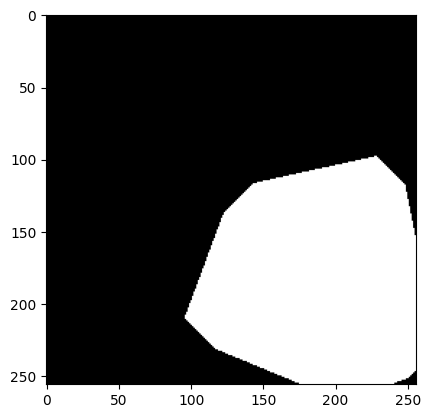

In [5]:
plt.imshow(image)

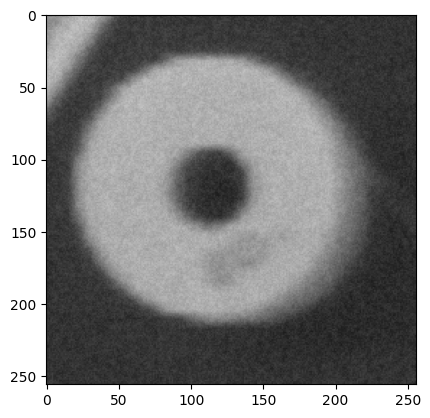

In [12]:
plt.imshow(image1)

# 16 Bits Images

In [12]:
image_16_bit = cv2.imread('/home/valiwis/Documents/Maestria/Imagenes y Vision/Taller 1/images/image_punto2.png', cv2.IMREAD_ANYDEPTH)
image1_16_bit = cv2.imread('/home/valiwis/Documents/Maestria/Imagenes y Vision/Taller 1/images/image1_punto2.png', cv2.IMREAD_ANYDEPTH)

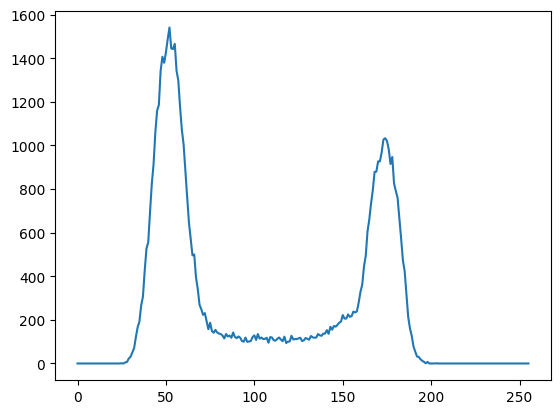

In [13]:
hist = cv2.calcHist([image_16_bit], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

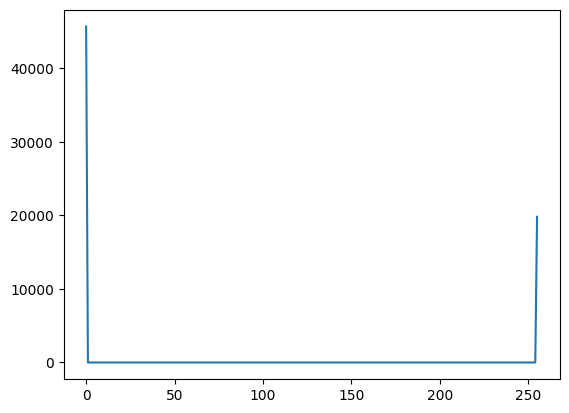

In [14]:
hist = cv2.calcHist([image1_16_bit], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

# Explicacion

# Operacion  de adición 

In [15]:
add_image =  cv2.add(image_16_bit, image1_16_bit)

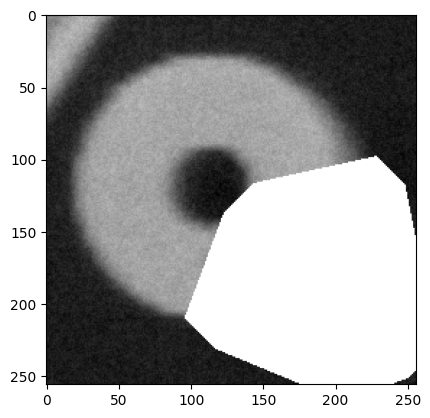

In [20]:
plt.imshow(add_image, cmap='gray')

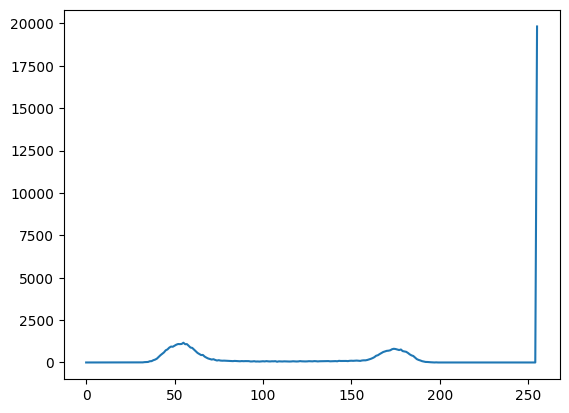

In [17]:
hist = cv2.calcHist([add_image], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

# Operacion  de sustracción

In [18]:
sub_image =  cv2.subtract(image_16_bit, image1_16_bit)

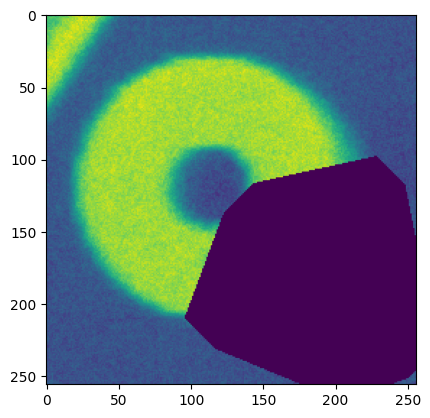

In [19]:
plt.imshow(sub_image)

# Explicacion

Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?